In [9]:
using Plots
pyplot(size=(550,500))

Plots.PyPlotBackend()

In [2]:
h = collect(10 .^ range(-17, stop=1, length=101))
x = 1/2
f(x) = sin(x)

f (generic function with 1 method)

In [4]:
diff_forward(f, x; h=sqrt(eps(Float64))) = (f(x+h) - f(x))/h
diff_central(f, x; h=cbrt(eps(Float64))) = (f(x+h/2) - f(x-h/2))/h
diff_complex(f, x; h=1e-20) = imag(f(x + h*im)) / h

diff_complex (generic function with 1 method)

In [5]:
errorforward = zeros(length(h), 1)
errorcentral = zeros(length(h), 1)
errorcomplex = zeros(length(h), 1)

for i=1:length(h)  
   errorforward[i] = abs(diff_forward(f, x, h = h[i]) - cos(x))
   errorcentral[i] = abs(diff_central(f, x, h = h[i]) - cos(x))
   errorcomplex[i] = abs(diff_complex(f, x, h = h[i]) - cos(x))
end

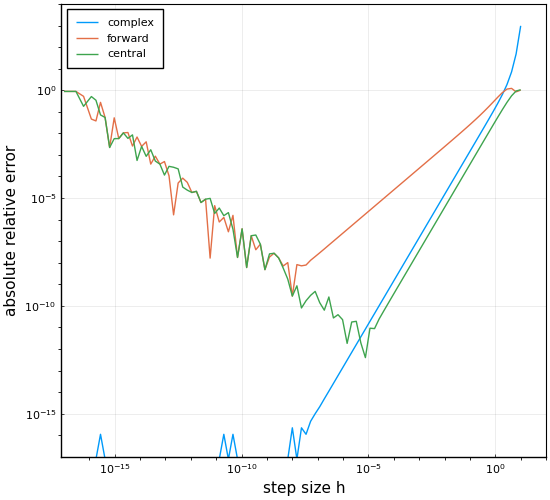

In [10]:
plot(h, errorcomplex, label = "complex")
plot!(h, errorforward, xaxis=:log, yaxis=:log, xlims = (1e-18,100), ylims = (1e-17,10e3), label = "forward")
plot!(h, errorcentral, framestyle = :box, label = "central", xlabel = "step size h", ylabel = "absolute relative error")